In [5]:
from dbfread import DBF
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, \
    RandomForestClassifier, RandomForestRegressor,  ExtraTreesRegressor, \
    BaggingRegressor,  GradientBoostingRegressor, \
    AdaBoostRegressor,  VotingRegressor, StackingRegressor, \
    HistGradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import datetime



import os
import ee
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
import csv
import datetime
from tqdm import tqdm


# DONNÉES BRUTES

In [6]:
okist = [
         ]
reversed_list = okist[::-1]
# print(reversed_list)


In [7]:


run =  int(input("Execute code? 1 = yes, 0 = no: "))

if run ==   1:
    # Lire le fichier DBF
    table = DBF('../data/use/afsp/GIS_Dbf/AfSP012Qry_Layers.dbf', encoding='latin-1')

    landsat_data_ = pd.read_csv('lansat_afsp_results_all.csv')
    df_ = pd.DataFrame(iter(table))

    # Afficher les colonnes principales
    # print(df[['ProfileID', 'LayerID', 'Sand', 'Clay', 'pH_H2O', 'OrgC']].head())

else:
    print("Code execution skipped.")

In [8]:
landsat_data = landsat_data_.copy()
df = df_.copy()
df = df[df['LayerNr'] == 1].copy()


In [9]:
print(df.columns.tolist())
df

['LyrObj', 'ProfileID', 'LayerID', 'LayerNr', 'UpDpth', 'LowDpth', 'Sampls', 'Sampl_ID', 'SamplAvai', 'HorDes', 'ColorM', 'ColorD', 'Mottling', 'StrGrade', 'StrSize', 'StrType', 'Sticknss', 'Pores', 'SaltAlkl', 'Roots', 'FldTxtr', 'CfFldCls', 'CfFldPc', 'CfPc', 'CfLabPc', 'Sand', 'Silt', 'Clay', 'SumTxtr', 'BlkDens', 'BlkDens2', 'Ksat', 'PHH2O', 'PHKCl', 'PHCaCl2', 'EC', 'EC2', 'SlblCat', 'SlblAn', 'ExCa', 'ExMg', 'ExNa', 'ExK', 'ExBases', 'ExH', 'ExAl', 'ExAcid', 'Ecec', 'CecSoil', 'CecSoil2', 'Bsat', 'Bsat2', 'CaSO4', 'CaCO3', 'InOrgC', 'TotC', 'OrgC', 'TotalN', 'CN', 'TotalP', 'VMCpF00', 'VMCpF05', 'VMCpF10', 'VMCpF15', 'VMCpF17', 'VMCpF18', 'VMCpF20', 'VMCpF22', 'VMCpF23', 'VMCpF24', 'VMCpF25', 'VMCpF27', 'VMCpF28', 'VMCpF29', 'VMCpF30', 'VMCpF33', 'VMCpF34', 'VMCpF35', 'VMCpF36', 'VMCpF37', 'VMCpF40', 'VMCpF42', 'VMCpF50', 'VMCpF58', 'VolAWC', 'LabTxtr', 'ClyMinera', 'Country', 'BD_rule']


,LyrObj,ProfileID,LayerID,LayerNr,UpDpth,LowDpth,Sampls,Sampl_ID,SamplAvai,HorDes,...,VMCpF37,VMCpF40,VMCpF42,VMCpF50,VMCpF58,VolAWC,LabTxtr,ClyMinera,Country,BD_rule
0,1.0,AO SOTER_P.1/57,AO SOTER_P.1/57_1,1.0,0.0,15.0,1.0,NA,N,NA,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,S,NA,AO,1.594
4,5.0,AO SOTER_P.101c/63,AO SOTER_P.101c/63_1,1.0,0.0,8.0,1.0,NA,N,Ah,...,-9999.0,-9999.0,4.0,-9999.0,-9999.0,5.0,S,NA,AO,1.582
10,11.0,AO SOTER_P.104c/62,AO SOTER_P.104c/62_1,1.0,0.0,8.0,1.0,NA,N,Ah1,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,LS,NA,AO,1.558
17,18.0,AO SOTER_P.107/66,AO SOTER_P.107/66_1,1.0,0.0,15.0,1.0,NA,N,NA,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,S,NA,AO,1.588
20,21.0,AO SOTER_P.110c/60,AO SOTER_P.110c/60_1,1.0,0.0,8.0,1.0,NA,N,NA,...,-9999.0,-9999.0,10.0,-9999.0,-9999.0,8.0,SCL,NA,AO,1.516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74950,80876.0,BF 30233_MU4,BF 30233_MU4_1,1.0,0.0,30.0,0.0,NA,NA,ABco,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NA,NA,BF,1.525
74951,80878.0,BF 30234_MU1,BF 30234_MU1_1,1.0,0.0,10.0,0.0,NA,NA,ABco,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NA,NA,BF,1.525
74952,80880.0,BF 30236_MU3,BF 30236_MU3_1,1.0,0.0,30.0,0.0,NA,NA,ABco,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NA,NA,BF,1.525
74953,80882.0,BF 30237_MU1,BF 30237_MU1_1,1.0,0.0,10.0,0.0,NA,NA,ABco,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NA,NA,BF,1.525


In [10]:
def calculate_indices(df):


    df = df.copy()
    df['nvdi'] = (df['B8'] - df['B4']) / (df['B8'] + df['B4'])
    df['gdvi'] = (df['B8'] - df['B3']) / (df['B8'] + df['B3'])
    df['msavi2'] = (2 * df['B8'] + 1 - np.sqrt((2 * df['B8'] + 1) ** 2 - 8 * (df['B8'] - df['B4']))) / 2
    df['psrinir'] = df['B8'] / df['B5']
    df['ndwi'] = (df['B3'] - df['B8']) / (df['B3'] + df['B8'])
    df['cigreen'] = (df['B4'] - df['B3']) / (df['B4'] + df['B3'])

    return df

In [11]:
'nvdi', 'gdvi', 'msavi2', 'psrinir', 'ndwi', 'cigreen', 

('nvdi', 'gdvi', 'msavi2', 'psrinir', 'ndwi', 'cigreen')

In [12]:

# Split train/test
def train( X_, Y_):
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.2, random_state=42)
    # Modèles
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
  
    
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
  
   
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "BaggingRegressor": BaggingRegressor(n_estimators=100, random_state=42),
    
    # "AdaBoostRegressor": AdaBoostRegressor(n_estimators=100, random_state=42),
    "VotingRegressor": VotingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('et', ExtraTreesRegressor(n_estimators=100, random_state=42)),
        ('br', BaggingRegressor(n_estimators=100, random_state=42)),
        
    ]),
    "StackingRegressor": StackingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('et', ExtraTreesRegressor(n_estimators=100, random_state=42)),
        ('br', BaggingRegressor(n_estimators=100, random_state=42)),
      
        
    ]),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor( random_state=42)

    }

    results = {}



    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'R2': r2, 'Model': model, 'Predictions': y_pred}
        
    # Affichage des résultats
    print("Comparaison des modèles :\n")
    for name, metrics in results.items():
        print(f"{name} :")
        print(f"  Mean Squared Error: {metrics['MSE']:.2f}")
        print(f"  R² Score: {metrics['R2']:.2f}")
        print("-" * 40)


In [13]:
def replace_outliers_with_quantile(df, column, lower_quantile=0.05, upper_quantile=0.95):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_value = df[column].quantile(lower_quantile)
    upper_value = df[column].quantile(upper_quantile)

    df[column] = np.where(df[column] < lower_bound, lower_value, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_value, df[column])

    # # Filtrer les valeurs aberrantes
    # filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df



<class 'pandas.core.frame.DataFrame'>
Index: 2969 entries, 238 to 18519
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProfileID  2969 non-null   object 
 1   Sand       2969 non-null   float64
 2   Clay       2969 non-null   float64
 3   PHH2O      2969 non-null   float64
 4   TotalN     2969 non-null   float64
 5   CN         2969 non-null   float64
 6   OrgC       2969 non-null   float64
 7   Satellite  2969 non-null   object 
 8   SR_B1      2969 non-null   float64
 9   SR_B2      2969 non-null   float64
 10  SR_B3      2969 non-null   float64
 11  SR_B4      2969 non-null   float64
 12  SR_B5      2969 non-null   float64
 13  SR_B7      2969 non-null   float64
dtypes: float64(12), object(2)
memory usage: 347.9+ KB


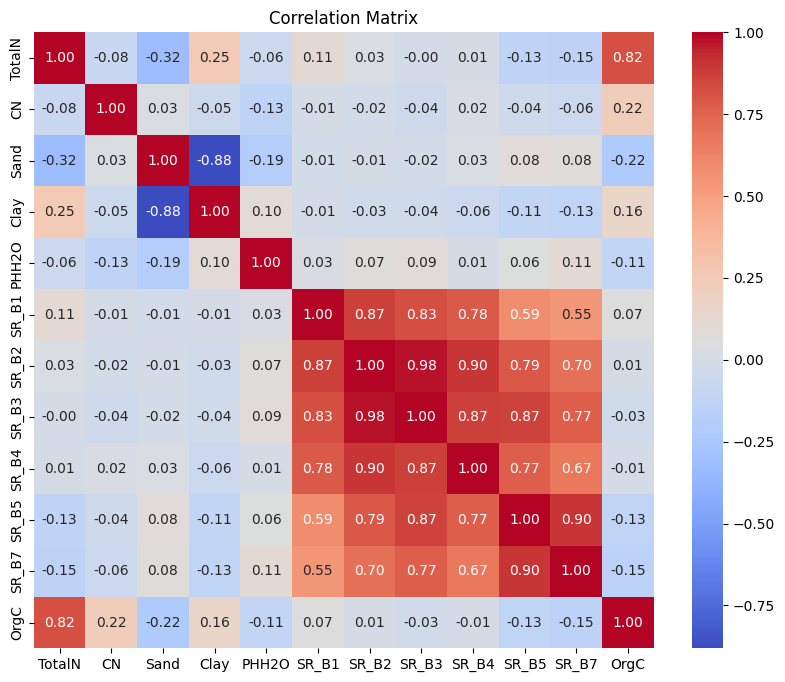

<class 'pandas.core.frame.DataFrame'>
Index: 1639 entries, 238 to 18519
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TotalN  1639 non-null   float64
 1   CN      1639 non-null   float64
 2   Sand    1639 non-null   float64
 3   Clay    1639 non-null   float64
 4   PHH2O   1639 non-null   float64
 5   SR_B1   1639 non-null   float64
 6   SR_B2   1639 non-null   float64
 7   SR_B3   1639 non-null   float64
 8   SR_B4   1639 non-null   float64
 9   SR_B5   1639 non-null   float64
 10  SR_B7   1639 non-null   float64
 11  OrgC    1639 non-null   float64
dtypes: float64(12)
memory usage: 166.5 KB
Variance de Y: 1.3739984627222144


/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-p

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 0.86
  R² Score: 0.03
----------------------------------------
Random Forest :
  Mean Squared Error: 0.97
  R² Score: -0.10
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 1.06
  R² Score: -0.20
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 0.95
  R² Score: -0.07
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 0.98
  R² Score: -0.10
----------------------------------------
VotingRegressor :
  Mean Squared Error: 0.94
  R² Score: -0.06
----------------------------------------
StackingRegressor :
  Mean Squared Error: 0.86
  R² Score: 0.03
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 1.11
  R² Score: -0.24
----------------------------------------


In [38]:
cols = ['TotalN','CN','Sand', 'Clay', 'PHH2O','SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'OrgC']
merge_data_landsat = pd.merge(df[['ProfileID',  'Sand', 'Clay', 'PHH2O', 'TotalN','CN','OrgC']], landsat_data[['ProfileID','Satellite' , 'SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B7']], on='ProfileID', how='left')
Nan = -9999.0
merge_data_landsat.replace(Nan, np.nan, inplace=True)

merge_data_landsat.dropna(inplace=True, axis=0, how='any')
# merge_data_landsat = calculate_indices(merge_data_landsat)
merge_data_landsat.info()


df_train = merge_data_landsat.copy()
df_train = df_train[df_train['Satellite'] == 'Landsat-5']

corr_matrix = df_train[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

df_train = df_train[cols]
df_train = replace_outliers_with_quantile(df_train, 'OrgC', lower_quantile=0.05, upper_quantile=0.95)

df_train.info()
Y = df_train['TotalN']
x_base = df_train.drop(columns=['OrgC', ]).copy()

#variance de Y
print("Variance de Y:", Y.var())
train(x_base[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7']], Y)


In [15]:

train(x_base, Y)

/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-p

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 39.23
  R² Score: 0.50
----------------------------------------
Random Forest :
  Mean Squared Error: 0.32
  R² Score: 1.00
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 0.51
  R² Score: 0.99
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 0.41
  R² Score: 0.99
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 0.34
  R² Score: 1.00
----------------------------------------
VotingRegressor :
  Mean Squared Error: 0.27
  R² Score: 1.00
----------------------------------------
StackingRegressor :
  Mean Squared Error: 0.26
  R² Score: 1.00
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 0.31
  R² Score: 1.00
----------------------------------------


In [17]:
X = x_base[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7']]
Y = df_train['OrgC']
train(X, Y)

/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/magayendiaye/projects/soc/env/lib/python3.13/site-p

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 72.68
  R² Score: 0.07
----------------------------------------
Random Forest :
  Mean Squared Error: 67.87
  R² Score: 0.13
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 69.98
  R² Score: 0.11
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 72.74
  R² Score: 0.07
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 68.27
  R² Score: 0.13
----------------------------------------
VotingRegressor :
  Mean Squared Error: 67.87
  R² Score: 0.13
----------------------------------------
StackingRegressor :
  Mean Squared Error: 68.35
  R² Score: 0.13
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 72.18
  R² Score: 0.08
----------------------------------------


<class 'pandas.core.frame.DataFrame'>
Index: 15323 entries, 0 to 18530
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ProfileID  15323 non-null  object 
 1   Sand       15323 non-null  float64
 2   Clay       15323 non-null  float64
 3   PHH2O      15323 non-null  float64
 4   TotalN     15323 non-null  float64
 5   CN         15323 non-null  float64
 6   OrgC       15323 non-null  float64
 7   B1         15323 non-null  float64
 8   B2         15323 non-null  float64
 9   B3         15323 non-null  float64
 10  B4         15323 non-null  float64
 11  B5         15323 non-null  float64
 12  B6         15323 non-null  float64
 13  B7         15323 non-null  float64
 14  B8         15323 non-null  float64
 15  B8A        15323 non-null  float64
 16  B9         15323 non-null  float64
 17  B10        15323 non-null  float64
 18  B11        15323 non-null  float64
 19  B12        15323 non-null  float64
 20  QA10       

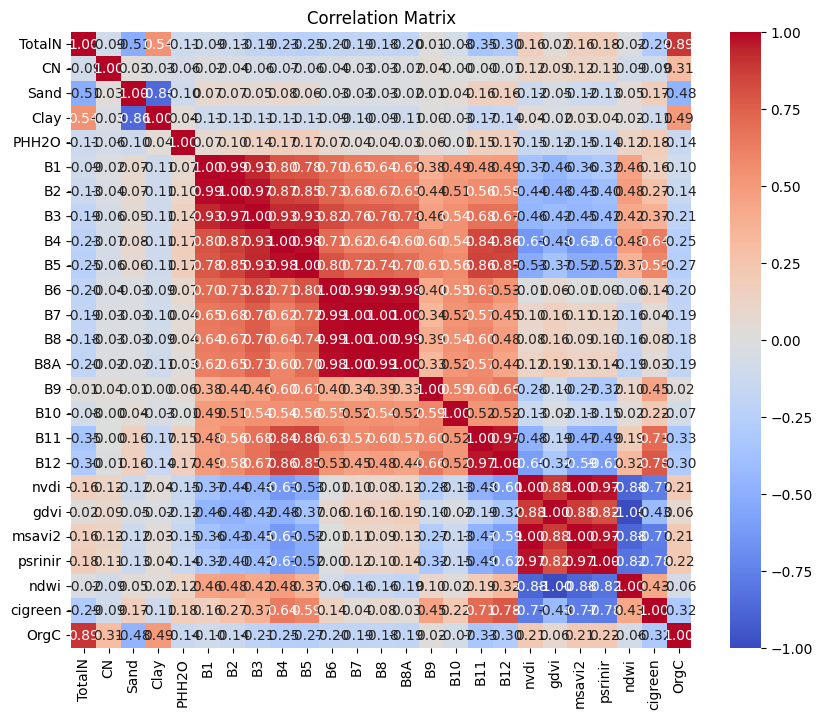

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TotalN   8050 non-null   float64
 1   CN       8050 non-null   float64
 2   Sand     8050 non-null   float64
 3   Clay     8050 non-null   float64
 4   PHH2O    8050 non-null   float64
 5   B1       8050 non-null   float64
 6   B2       8050 non-null   float64
 7   B3       8050 non-null   float64
 8   B4       8050 non-null   float64
 9   B5       8050 non-null   float64
 10  B6       8050 non-null   float64
 11  B7       8050 non-null   float64
 12  B8       8050 non-null   float64
 13  B8A      8050 non-null   float64
 14  B9       8050 non-null   float64
 15  B10      8050 non-null   float64
 16  B11      8050 non-null   float64
 17  B12      8050 non-null   float64
 18  nvdi     8050 non-null   float64
 19  gdvi     8050 non-null   float64
 20  msavi2   8050 non-null   float64
 21  psrinir  8050 

In [91]:
cols = ['TotalN','CN','Sand', 'Clay', 'PHH2O','B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'nvdi', 'gdvi', 'msavi2', 'psrinir', 'ndwi', 'cigreen', 'OrgC']
merge_data_sentinel = pd.merge(df[['ProfileID',  'Sand', 'Clay', 'PHH2O', 'TotalN','CN', 'OrgC']], sentinel_data[['ProfileID', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']], on='ProfileID', how='left')
merge_data_sentinel.dropna(inplace=True, axis=0, how='any')
merge_data_sentinel = calculate_indices(merge_data_sentinel)
merge_data_sentinel.info()
# corr_matrix = merge_data_sentinel[['Sand', 'Clay', 'PHH2O', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'ndwi','cigreen', 'OrgC']].corr()
merge_data_sentinel_2 = merge_data_sentinel[cols]

Nan = -9999.0
merge_data_sentinel_2 = merge_data_sentinel_2.replace(Nan, np.nan)
merge_data_sentinel_2.dropna(inplace=True, axis=0, how='any')
merge_data_sentinel_2.reset_index(drop=True, inplace=True)
corr_matrix = merge_data_sentinel_2.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

df_train = merge_data_sentinel.copy()


df_train = df_train[cols]
Nan = -9999.0

# REMPLACER -9990 par nan dans df_train

df_train = df_train.replace(Nan, np.nan)
df_train.dropna(inplace=True, axis=0, how='any')
df_train.reset_index(drop=True, inplace=True)
df_train.info()



df_train = replace_outliers_with_quantile(df_train, 'OrgC')

Y = df_train['OrgC']
print("Nombre de valeurs uniques dans Y:", Y)
x_base = df_train.drop(columns=['OrgC', ]).copy()
#variance de Y 
print("Variance de Y:", Y.var())
# VARIANCE GRAPHIQUE
# plt.figure(figsize=(10, 6))
# sns.histplot(Y, kde=True)
# plt.title('Distribution of Organic Carbon (OrgC)')
# list(Y.unique().sort())
# normalization
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# Y = scaler.fit_transform(Y.values.reshape(-1, 1)).flatten()




# df = df[['SumTxtr', 'CecSoil', 'PHH2O', 'ExBases',  'OrgC', 'CN', 'TotalN']]

In [84]:
# X = x_base[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', ]].copy()
train(x_base, Y)

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 27.47
  R² Score: 0.77
----------------------------------------
Random Forest :
  Mean Squared Error: 0.86
  R² Score: 0.99
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 1.06
  R² Score: 0.99
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 1.29
  R² Score: 0.99
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 0.85
  R² Score: 0.99
----------------------------------------
VotingRegressor :
  Mean Squared Error: 0.84
  R² Score: 0.99
----------------------------------------
StackingRegressor :
  Mean Squared Error: 0.80
  R² Score: 0.99
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 0.78
  R² Score: 0.99
----------------------------------------


# 'SumTxtr', 'PHH2O', 'ExBases', 'OrgC', 'CN', 'TotalN'

In [71]:
X = x_base[['B4', 'B5', 'B6', 'cigreen']]
train(X, Y)

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 99.71
  R² Score: 0.13
----------------------------------------
Random Forest :
  Mean Squared Error: 62.56
  R² Score: 0.45
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 75.54
  R² Score: 0.34
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 62.91
  R² Score: 0.45
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 62.55
  R² Score: 0.45
----------------------------------------
VotingRegressor :
  Mean Squared Error: 62.05
  R² Score: 0.46
----------------------------------------
StackingRegressor :
  Mean Squared Error: 61.98
  R² Score: 0.46
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 62.52
  R² Score: 0.45
----------------------------------------


In [72]:
X = x_base[[ 'ndwi','nvdi', 'gdvi', 'msavi2', 'psrinir', 'cigreen' ]]
train(X, Y)

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 100.26
  R² Score: 0.12
----------------------------------------
Random Forest :
  Mean Squared Error: 62.36
  R² Score: 0.46
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 75.19
  R² Score: 0.34
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 62.93
  R² Score: 0.45
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 62.35
  R² Score: 0.46
----------------------------------------
VotingRegressor :
  Mean Squared Error: 61.74
  R² Score: 0.46
----------------------------------------
StackingRegressor :
  Mean Squared Error: 61.71
  R² Score: 0.46
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 62.90
  R² Score: 0.45
----------------------------------------


In [79]:
X = x_base[['Sand', 'Clay', 'PHH2O',]]
train(X, Y)

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 74.00
  R² Score: 0.27
----------------------------------------
Random Forest :
  Mean Squared Error: 74.38
  R² Score: 0.27
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 68.85
  R² Score: 0.32
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 78.00
  R² Score: 0.23
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 74.16
  R² Score: 0.27
----------------------------------------
VotingRegressor :
  Mean Squared Error: 70.65
  R² Score: 0.31
----------------------------------------
StackingRegressor :
  Mean Squared Error: 68.05
  R² Score: 0.33
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 69.69
  R² Score: 0.31
----------------------------------------


In [106]:
X = x_base[['TotalN','PHH2O', ]]
train(X, Y)

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 46.14
  R² Score: 0.65
----------------------------------------
Random Forest :
  Mean Squared Error: 26.18
  R² Score: 0.80
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 23.01
  R² Score: 0.83
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 30.25
  R² Score: 0.77
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 26.25
  R² Score: 0.80
----------------------------------------
VotingRegressor :
  Mean Squared Error: 24.75
  R² Score: 0.81
----------------------------------------
StackingRegressor :
  Mean Squared Error: 23.05
  R² Score: 0.83
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 23.81
  R² Score: 0.82
----------------------------------------


In [100]:
Y= df_train['PHH2O']
X= x_base[['B4', 'B5', 'B6', 'B7', ]]
train(X, Y)

Comparaison des modèles :

Linear Regression :
  Mean Squared Error: 0.94
  R² Score: 0.06
----------------------------------------
Random Forest :
  Mean Squared Error: 0.57
  R² Score: 0.43
----------------------------------------
GradientBoostingRegressor :
  Mean Squared Error: 0.59
  R² Score: 0.41
----------------------------------------
ExtraTreesRegressor :
  Mean Squared Error: 0.58
  R² Score: 0.43
----------------------------------------
BaggingRegressor :
  Mean Squared Error: 0.57
  R² Score: 0.43
----------------------------------------
VotingRegressor :
  Mean Squared Error: 0.55
  R² Score: 0.45
----------------------------------------
StackingRegressor :
  Mean Squared Error: 0.56
  R² Score: 0.45
----------------------------------------
HistGradientBoostingRegressor :
  Mean Squared Error: 0.57
  R² Score: 0.43
----------------------------------------
